In [2]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [3]:
using Revise

In [4]:

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [5]:
using StatsBase, Distributions, Plots, LinearAlgebra

In [4]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [5]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [6]:
n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)

1000×1 Matrix{Int64}:
 1
 1
 1
 1
 1
 2
 1
 2
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 2
 1

In [7]:
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.215632   0.0758754
  0.0553969  0.0975597
  0.226421   0.0923703
  0.0786813  0.105706
  0.0817403  0.106659
  0.107634   0.0893478
  0.168629   0.105405
  0.239306   0.10278
  0.0841381  0.119991
  0.191298   0.100456
  ⋮          
  0.16914    0.143829
 -0.0348329  0.130046
  0.264078   0.109695
  0.16277    0.0975001
  0.093066   0.0914685
  0.147835   0.0922013
  0.285817   0.127356
 -0.156495   0.10268
 -0.04313    0.0214939

In [8]:
Y = collect(test_returns)
T = n_samples
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


999×2 Matrix{Float64}:
 0.768325    0.231675
 0.885922    0.114078
 0.904255    0.0957454
 0.940637    0.0593631
 0.970434    0.0295661
 0.973457    0.0265426
 0.972577    0.0274228
 0.944998    0.055002
 0.977712    0.0222881
 0.987798    0.0122022
 ⋮           
 0.848312    0.151688
 0.481263    0.518737
 0.715541    0.284459
 0.928403    0.0715971
 0.925319    0.0746805
 0.858439    0.141561
 0.515605    0.484395
 0.00250659  0.997493
 0.26745     0.73255

In [12]:
initial_states

UndefVarError: UndefVarError: `initial_states` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

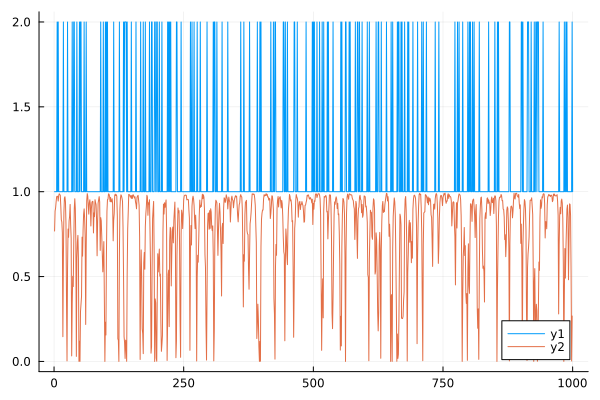

In [10]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


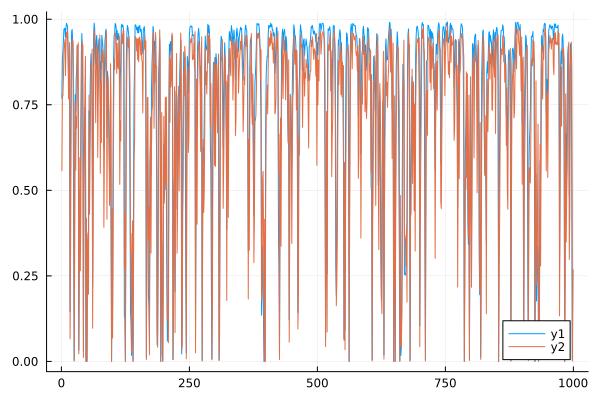

In [11]:
plot(smoothed_regimes[:,1])
plot!(est_regimes[:,1])

- Β1 = [.09 .3 .2; .03 .1 .6] 
- Σ1 = cor2cov([1 .3; .3 1], [.08, .03]) 
- Β2 = [-.02 .35 .25; .035 .15 .63] 
- Σ2 = cor2cov([1 .35; .35 1], [.18, .035]) 

In [12]:
coef, cov_matrix = est_regimes_params(Y[2:end,:], X, smoothed_regimes)

display(round.(coef[1]', digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

2×3 Matrix{Float64}:
 0.0877  0.2552  0.3708
 0.0266  0.0804  0.7031

2×2 Matrix{Float64}:
 1.0     0.3464
 0.3464  1.0

2-element Vector{Float64}:
 0.0767
 0.0365

In [13]:
display(round.(coef[2]', digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

2×3 Matrix{Float64}:
 -0.0644  0.1355  0.9084
  0.0486  0.1862  0.8098

2×2 Matrix{Float64}:
 1.0     0.6631
 0.6631  1.0

2-element Vector{Float64}:
 0.173
 0.0498

In [50]:
est_transition_matrix(smoothed_regimes, initial_states)

MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any, ::Any, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [15]:
tm = est_transition_matrix(er, states_zero)

MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any, ::Any, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [16]:
ones(2)' * Matrix(I, 2,2)

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  1.0

#TODO 
- sas

In [17]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#- zrobić testy stabilne, np seed lub porwnanie rozkładow
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

BETA coefficient
 
#Beta and intercept time varing

In [18]:
Y = [.16 .05; .13 .045; .07 .03; .08 .035; .11 .04]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045; 1. .07 .03; 1. .11 .04]

regimes_probs = [.9 .1; .8 .2; .7 .3; .7 .3; .8 .2]


5×2 Matrix{Float64}:
 0.9  0.1
 0.8  0.2
 0.7  0.3
 0.7  0.3
 0.8  0.2

In [19]:
regime_matrix = diagm(regimes_probs[:,1])
Xhat = calc_xhat(X, regime_matrix) 
Β1 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ1 = calc_cov_matrix(U, regime_matrix)

display(round.(Β1, digits=4))
display(round.(cov2cor(Σ1), digits=4))
display(round.(std(Σ1), digits=4))

3×2 Matrix{Float64}:
  0.0197   0.0284
 -0.1873  -0.0301
  2.8309   0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

0.0001

In [20]:
regime_matrix = diagm(regimes_probs[:,2])
Xhat = calc_xhat(X, regime_matrix) 
Β2 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ2 = calc_cov_matrix(U, regime_matrix)

display(round.(Β2, digits=4))
display(round.(cov2cor(Σ2), digits=4))
display(round.(sqrt.(diag(Σ2)), digits=4))

3×2 Matrix{Float64}:
 -0.1316  -0.0073
 -2.5617  -0.7141
 14.9374   3.9496

2×2 Matrix{Float64}:
 1.0     0.9877
 0.9877  1.0

2-element Vector{Float64}:
 0.0535
 0.0184

In [21]:
coef, cov_matrix = est_regimes_params(Y, X, regimes_probs)

display(round.(coef[1], digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

3×2 Matrix{Float64}:
  0.0197   0.0284
 -0.1873  -0.0301
  2.8309   0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

2-element Vector{Float64}:
 0.0157
 0.0037

In [22]:
display(round.(coef[2], digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

3×2 Matrix{Float64}:
 -0.1316  -0.0073
 -2.5617  -0.7141
 14.9374   3.9496

2×2 Matrix{Float64}:
 1.0     0.9999
 0.9999  1.0

2-element Vector{Float64}:
 0.0309
 0.0088

In [23]:

regimes = [.6 .4;.75 .25; .9 .1; .9 .1; .8 .2]
r0 = [.66, .34] # initial regimes probs
s = sum(regimes, dims=1)
k = kron([1, 1], s[1,:])

4-element Vector{Float64}:
 3.95
 1.05
 3.95
 1.05

In [24]:
#transition probs from probs of regimes

k2 = [kron(r0, regimes[1,:]), kron(regimes[1,:], regimes[2,:]), kron(regimes[2,:], regimes[3,:])]
k2sum = sum(k2, dims=1)[1]



4-element Vector{Float64}:
 1.521
 0.48900000000000005
 0.729
 0.261

In [25]:
r = k2sum ./ k
r = reshape(r, (2,2))

2×2 Matrix{Float64}:
 0.385063  0.184557
 0.465714  0.248571

In [26]:
sum(r, dims=2)

2×1 Matrix{Float64}:
 0.5696202531645569
 0.7142857142857143

In [28]:
vec(transition_matrix) .* kron(smoothed_regimes[2,:] ./ est_regimes[2,:], est_regimes[1,:]) 

4-element Vector{Float64}:
 0.5387138719323009
 0.10059444694408703
 0.04323656698169617
 0.18300152539387785

In [29]:
transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

er = expected_regimes(states_zero,transition_matrix, 5)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [30]:
result = zeros(5,4)
result[1,:] = kron(er[1,:], states_zero)
T = size(result)[1]

for t in 2:T
    result[t,:] = kron(er[t,:], er[t-1,:])
end

k2 = result

5×4 Matrix{Float64}:
 0.7065    0.0785    0.1935    0.0215
 0.557546  0.152704  0.227454  0.0622963
 0.469946  0.191717  0.240304  0.0980333
 0.416901  0.21318   0.244762  0.125158
 0.384067  0.225485  0.246013  0.144434

In [31]:
kron(Matrix(I, 4, 4), ones(2))

8×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0

In [32]:
k1 = kron(ones(2), states_zero + vec(sum(er, dims=1)))

sum(k2)[1] ./ k1

4-element Vector{Float64}:
 1.1637255938831732
 2.9352120010985763
 1.1637255938831732
 2.9352120010985763

In [33]:

transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

regimes  = expected_regimes(states_zero, transition_matrix,  5)

smoothed_regimes = smoother(regimes, transition_matrix)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [34]:
vec(transition_matrix)

4-element Vector{Float64}:
 0.85
 0.2
 0.15
 0.8

In [35]:
.61 * .85

0.5185

In [36]:
using Test

In [37]:
jr = joined_regimes_probs(regimes, smoothed_regimes, states_zero, transition_matrix)
jr_sum = sum(jr, dims=1)


1×4 Matrix{Float64}:
 3.13394  0.262601  0.553049  1.05041

In [38]:
s = sum(regimes[1:end-1,:], dims=1)[1,:] + states_zero

k = kron([1, 1], s)


4-element Vector{Float64}:
 3.686993125
 1.3130068750000004
 3.686993125
 1.3130068750000004

In [39]:
e_tm = jr_sum[1,:] ./ k
e_tm = reshape(e_tm, 2, 2)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [40]:
sum(e_tm, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [41]:
sum(jr, dims=2) .≈ 1 

5×1 BitMatrix:
 1
 1
 1
 1
 1

In [42]:
est_transition_matrix(jr, regimes, states_zero)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [43]:
size(transition_matrix,1)

2

In [44]:
initial_states_probs

UndefVarError: UndefVarError: `initial_states_probs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [45]:
P = transition_matrix
N = size(P, 1)
    
    # Construct the matrix A for solving Ax = b where x is π
A = [P' - I; ones(1, N)]

b = [zeros(N); 1.0]
    
    # Solve for π using backslash operator (Gaussian elimination)
π = A \ b

2-element Vector{Float64}:
 0.5714285714285716
 0.4285714285714283

In [46]:
initial_regimes_probs(transition_matrix)

2-element Vector{Float64}:
 0.5714285714285716
 0.4285714285714283

In [47]:
@test initial_states ≈ π atol=0.0001

Test Passed

In [55]:
expected_regimes( states_zero, transition_matrix, 3)

3×2 Matrix{Float64}:
 0.83    0.17
 0.781   0.219
 0.7467  0.2533

In [11]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.9 .1;.2 .8]

states_zero = [.9, .1]

Y = [.16 .05; .13 .045; .07 .03; .08 .035; .11 .04]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045; 1. .07 .03; 1. .11 .04]

log_likehood(Y, X, [Β1, Β2], [Σ1, Σ2], transition_matrix, states_zero)

17.530266756846856

initial values
- filter
- smoot
- regresors
- covariance
- transition matrix
- zero regimes
  